In [ ]:
# STROKE PREDICTION 

                                                                     PROJECT BY :- Love Fadia

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline


In [2]:
Data = pd.read_csv("stroke.csv")

In [3]:
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
Data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
Data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Data Visualization and cleaning

<function matplotlib.pyplot.show(close=None, block=None)>

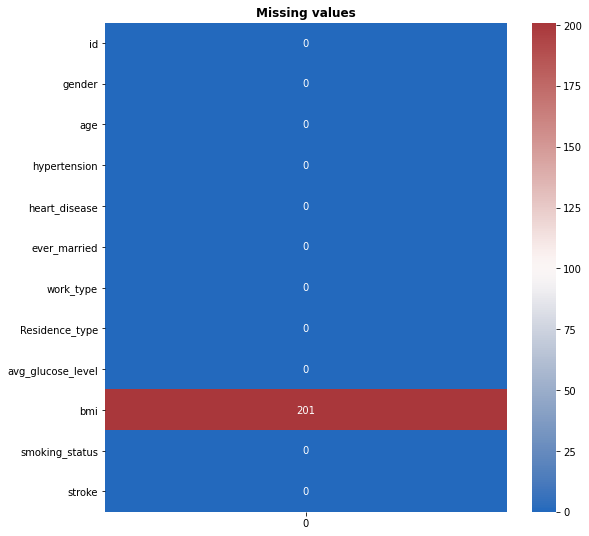

In [6]:
plt.figure(figsize=(9,9))
plt.title("Missing values",fontweight="bold")
ax = sns.heatmap(Data.isna().sum().to_frame(),annot=True,fmt="d",cmap="vlag")
ax.set_label("Amount missing")
plt.show

### Only 1 feature has missing values

In [7]:
Data =Data.fillna(Data.mean())

In [8]:
Data[Data["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [9]:
Data.drop([3116]
,inplace=True)

In [10]:
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:>

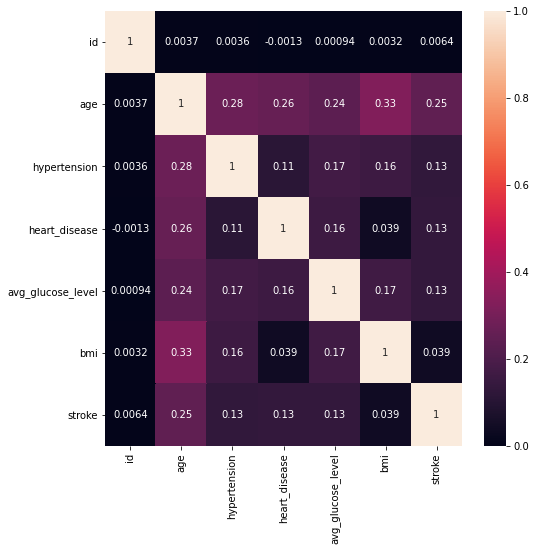

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data= Data.corr(), annot= True)


In [12]:
Data.drop("id",axis=1,inplace=True)

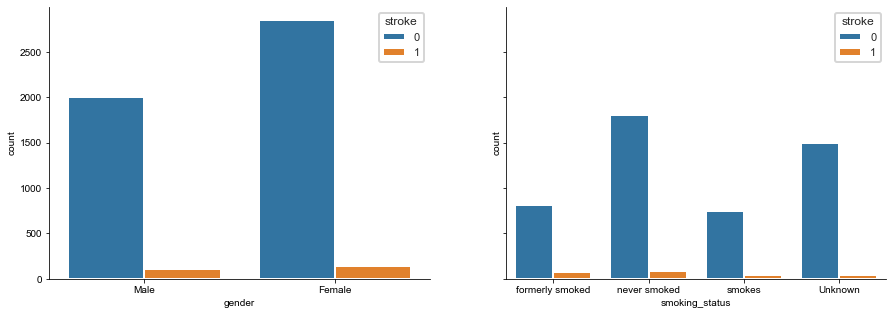

In [13]:
fig ,(ax1 ,ax2) = plt.subplots(1,2,figsize = (15,5),sharey=True)
sns.set_style("white")
sns.set_context("poster",font_scale=0.5)


sns.countplot(x ="gender", hue ="stroke" , data=Data ,ax= ax1, palette="tab10", )
sns.despine()

sns.countplot(x ="smoking_status",hue="stroke",data=Data,ax= ax2,palette="tab10")
sns.despine()

plt.show()


### It is evident that Female patients had sufferes more strokes than male.  

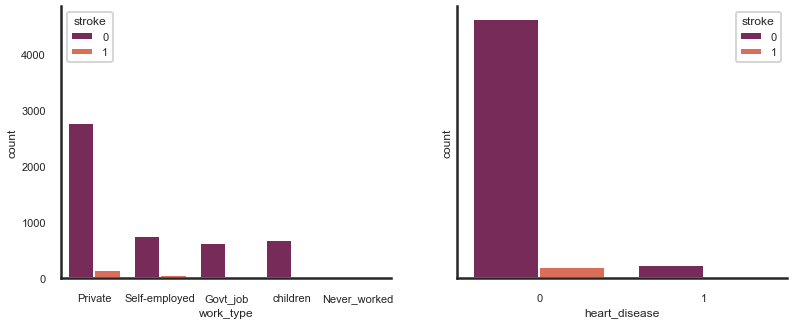

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (13,5),sharey=True)
sns.set_style("white")
sns.set_context("poster",font_scale=0.5)

sns.countplot(x="work_type",hue="stroke",data=Data, ax = ax1 , palette="rocket")
sns.despine()

sns.countplot(x ="heart_disease",hue="stroke",data = Data,ax=ax2,palette="rocket")
sns.despine()
plt.show()

### Most of the strokes were reported by patients doing a private job and apparently , patients who had previous heart conditions suffered less strokes

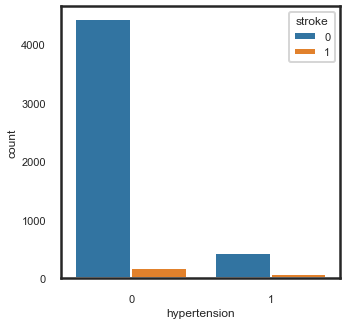

In [15]:
sns.set_style("white")
sns.set_context("poster",font_scale=0.5)

plt.figure(figsize=(5,5))
sns.countplot(x ="hypertension", hue="stroke", data=Data , palette= "tab10")

plt.show()

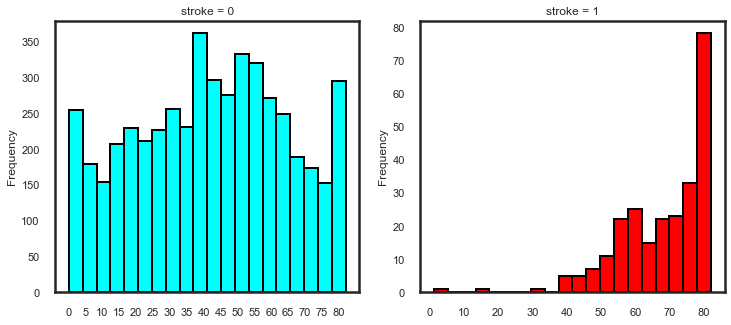

In [16]:
f ,ax = plt.subplots(1,2,figsize=(12,5))

Data.loc[Data["stroke"]==0]["age"].plot.hist(ax=ax[0],bins=20,edgecolor = "black" ,color = "cyan")
ax[0].set_title("stroke = 0")
ax1 = list(range(0,85,5))
ax[0].set_xticks(ax1)

Data.loc[Data["stroke"]==1]["age"].plot.hist(ax = ax[1],bins=20,edgecolor ="black" ,color = "red")
ax[1].set_title("stroke = 1")
ax2 = list(range(0,85,5))
ax[0].set_xticks(ax2)
plt.show()

### Typically patients with higher age suffered from stroke . Furthermore people aged between 70-80 suffered more strokes than any other age group

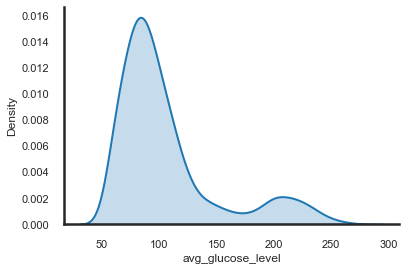

In [17]:
sns.set_style("white")
sns.kdeplot(x ="avg_glucose_level",data=Data , shade=True)
sns.despine()


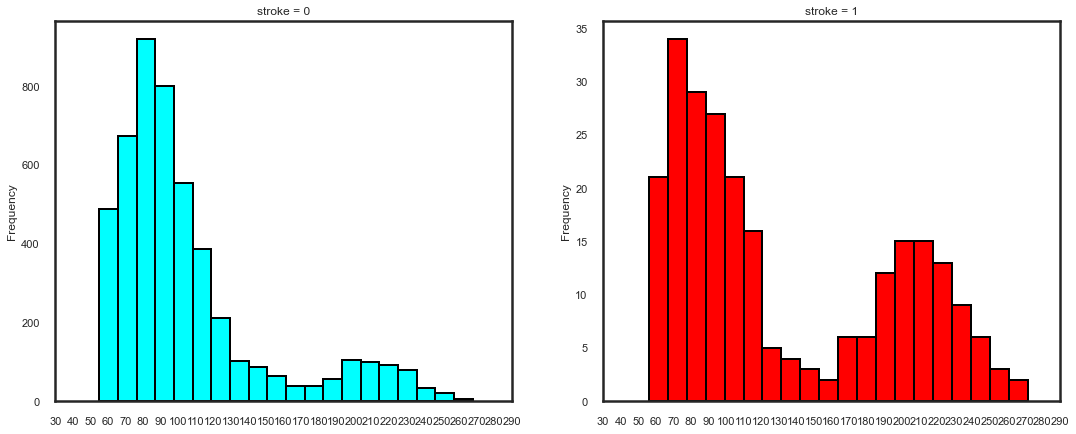

In [18]:
f ,ax = plt.subplots(1,2,figsize=(18,7))

Data.loc[Data["stroke"]==0]["avg_glucose_level"].plot.hist(ax=ax[0],bins=20,edgecolor = "black" ,color = "cyan")
ax[0].set_title("stroke = 0")
ax1 = list(range(30,300,10))
ax[0].set_xticks(ax1)

Data.loc[Data["stroke"]==1]["avg_glucose_level"].plot.hist(ax = ax[1],bins=20,edgecolor ="black" ,color = "red")
ax[1].set_title("stroke = 1")
ax2 = list(range(30,300,10))
ax[1].set_xticks(ax2)
plt.show()

(array([4.110e+02, 1.963e+03, 2.010e+03, 5.750e+02, 1.050e+02, 3.700e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 [<matplotlib.patches.Polygon at 0x22ade9225b0>])

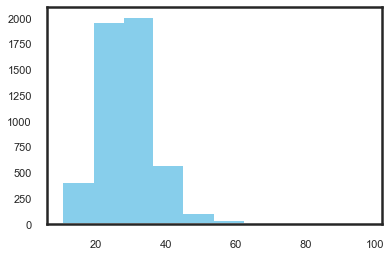

In [19]:
plt.hist('bmi', data=Data, histtype='stepfilled',color='skyblue')

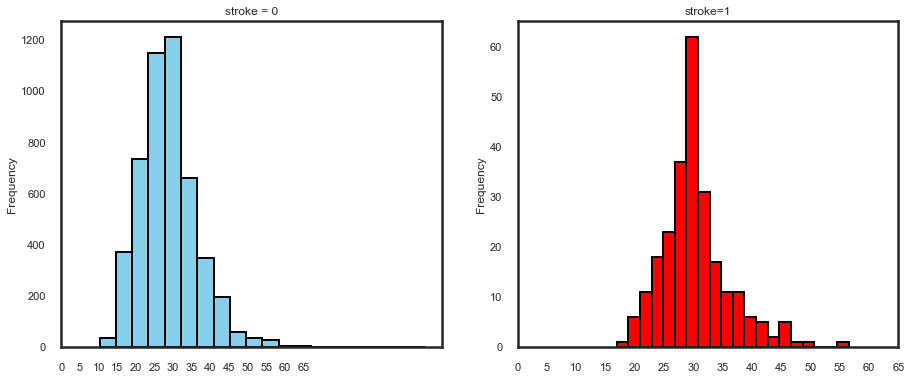

In [20]:
f,ax = plt.subplots(1,2, figsize=(15,6))

Data.loc[Data['stroke'] ==0]['bmi'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='skyblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 70, 5))
ax[0].set_xticks(ax1)

Data.loc[Data['stroke']==1]['bmi'].plot.hist(ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(0, 70, 5))
ax[1].set_xticks(x2)
plt.show()

### Most of people's bmi levels are around 20 to 30 and higher do not mean they are more likely to have a stroke.Hence bmi value doesnot have very efficient dependence on stroke prediction

# Dividing Categorical and numerical data

In [21]:

a =(Data.dtypes =="object")
cat_columns = list(a[a].index)
cat_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [22]:
Data = pd.get_dummies(data= Data , columns= cat_columns)
Data = pd.get_dummies(data=Data , columns=["hypertension"])
Data = pd.get_dummies(data=Data, columns= ["heart_disease"])

In [23]:
b = (Data.dtypes=="float64")
num_columns = list(b[b].index)
num_columns

['age', 'avg_glucose_level', 'bmi']


# Scaling Data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Data[num_columns] = scaler.fit_transform(Data[num_columns])
Data[num_columns]

,age,avg_glucose_level,bmi
0,1.051242,2.706450,1.001041
1,0.785889,2.121652,-0.000165
2,1.626174,-0.004867,0.468399
3,0.255182,1.437473,0.715233
4,1.581949,1.501297,-0.635858
...,...,...,...
5105,1.626174,-0.494481,-0.000165
5106,1.670400,0.420922,1.442744
5107,-0.363976,-0.511266,0.221565
5108,0.343633,1.328375,-0.427998


In [25]:
Data.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,1.051242,2.706450,1.001041,1,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1,0.785889,2.121652,-0.000165,1,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,1.626174,-0.004867,0.468399,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0.255182,1.437473,0.715233,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
4,1.581949,1.501297,-0.635858,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0


### Dropping Stroke column from dataset

In [26]:
X = Data.drop("stroke",axis=1).values
y = Data["stroke"].values

# Train-test-crossvalidation splitting

In [27]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X, y, test_size=0.4,random_state=2021)
X_valid ,X_test , y_valid, y_test = train_test_split(X_test,y_test , test_size= 0.5,random_state=2021)

# Importing Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score 

# Fitting models

In [29]:
lr = LogisticRegression(random_state=350)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_valid)
LR_SCORE =f1_score(y_valid ,y_pred, average='micro')
LR_SCORE

0.952054794520548

Text(0, 0.5, 'Error Rate')

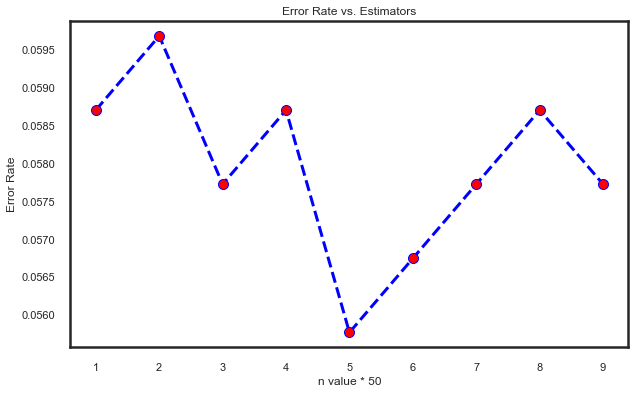

In [30]:
from sklearn.ensemble import RandomForestClassifier
error_rate = []
estimator=[50,100,150,200,250,300,350,400,450]
for i in estimator:
	
	RFC=RandomForestClassifier(n_estimators=i)
	RFC.fit(X_train, y_train)
	pred_i = RFC.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 10), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. Estimators')
plt.xlabel('n value * 50')
plt.ylabel('Error Rate')

In [36]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_valid)
RF_SCORE =f1_score(y_valid ,y_pred1, average='micro')
RF_SCORE

0.949119373776908

In [32]:
svc = SVC(C=3.0,kernel='linear')
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_valid)
SVC_SCORE = f1_score(y_valid,y_pred2,average="micro")
SVC_SCORE

0.952054794520548

# Model evaluation

In [37]:
Acc_score = pd.DataFrame({"Model" : ["Logistic Regression","RandomForestClassifier","Support Vector Classifier"], 
                     "Accuracy" : [LR_SCORE,RF_SCORE,SVC_SCORE]})
Acc_score

,Model,Accuracy
0,Logistic Regression,0.952055
1,RandomForestClassifier,0.949119
2,Support Vector Classifier,0.952055


### Logistic Regression has the highest accuracy

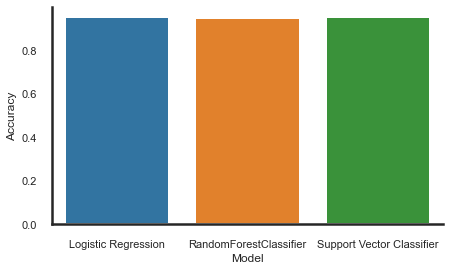

In [38]:
plt.figure(figsize=(7,4))
sns.barplot(x=Acc_score["Model"],y=Acc_score["Accuracy"])
sns.despine()

In [35]:
from joblib import dump,load
dump(lr, "STROKE.joblib")

['STROKE.joblib']